In [1]:
from fastkaggle import *

In [2]:
# for working with paths in Python, I recommend using `pathlib.Path`
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not iskaggle and not cred_path.exists():
    raise Exception('Need to download kaggle credentials')

In [3]:
comp = 'tpu-getting-started'

path = setup_comp(comp, install='fastai "timm>=0.6.2.dev0"')

In [4]:
path

Path('tpu-getting-started')

In [12]:
import timm
import functools
import itertools
from fastai.vision.all import *

path.ls()

(#5) [Path('tpu-getting-started/tfrecords-jpeg-512x512'),Path('tpu-getting-started/tfrecords-jpeg-224x224'),Path('tpu-getting-started/sample_submission.csv'),Path('tpu-getting-started/tfrecords-jpeg-331x331'),Path('tpu-getting-started/tfrecords-jpeg-192x192')]

In [28]:
data_paths = list(filter(lambda x: str(x) != "tpu-getting-started/sample_submission.csv", path.ls()))
data_paths = functools.reduce(lambda acc, path: list(itertools.chain(acc, (path/'train').ls(), (path/'val').ls())), data_paths, [])

In [30]:
import tensorflow as tf

data = []
# https://www.tensorflow.org/tutorials/load_data/tfrecord#reading_a_tfrecord_file_in_python
raw_dataset = tf.data.TFRecordDataset(data_paths)

for record in raw_dataset:
    example = tf.train.Example()
    example.ParseFromString(record.numpy())
    datum = [
        example.features.feature['class'].int64_list.value[0],
        example.features.feature['image'].bytes_list.value[0]
    ]
    data.append(datum)

len(data)

65860

(512, 512)


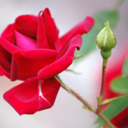

In [9]:
img = PILImage.create(data[0][1])
print(img.size)
img.to_thumb(128)

In [10]:
from fastcore.parallel import *

def f(o): return PILImage.create(o[1]).size
sizes = parallel(f, data, n_workers=8)
pd.Series(sizes).value_counts()

(512, 512)    12753
Name: count, dtype: int64

In [11]:
# https://pytorch.org/torcheval/stable/generated/torcheval.metrics.functional.multiclass_f1_score.html
